## 재비산먼지 평균농도와 기온 간의 관계
링크: https://www.data.go.kr/data/15021888/fileData.do

데이터명: 한국환경공단_도로 재비산먼지 측정 정보

재비산먼지 평균농도와 기온 간의 관계를 알아보기 위해 데이터프레임을 편집하고 군집화합니다.

In [1]:
# import the Seaborn package for good data visualization.

%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# matplotlib에서 한글을 출력하기 위해 폰트를 설정
font_path = './NanumGothic.ttf' # 폰트 경로 설정
font_manager.fontManager.addfont(font_path) # 폰트 등록
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name() # 폰트 설정

import pandas as pd
import seaborn as sns

In [3]:
# append the song data from nigerian-songs.csv.
# Load up a dataframe with some data about the songs. 

df = pd.read_csv("./한국환경공단_도로 재비산먼지 측정 정보_20240331.csv") # 데이터 로드

df.head() # 데이터프레임의 상위 5개 출력

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,2024-03-04,10:47,서울,성동구,고산자로,서울특별시 성동구 마장동 610-10천,서울특별시 성동구 성수동1가 701-1천,6,33,25,매우좋음
1,2024-03-04,11:42,서울,구로구,구로중앙로,서울특별시 양천구 신정동 330-8제,서울특별시 구로구 구로동 147-5 도,8,26,56,좋음
2,2024-03-04,12:02,서울,구로구,경인로,서울특별시 구로구 신도림동 330-7도,서울특별시 구로구 온수동 44-23 도,9,25,34,매우좋음
3,2024-03-04,12:35,서울,구로구,서해안로,서울특별시 구로구 개봉동 237-12 철,서울특별시 구로구 항동 산50-10 도,9,24,52,좋음
4,2024-03-04,12:54,경기,부천시,양지로,경기도 부천시 옥길동 739-4 도,경기도 부천시 괴안동 50 도,9,25,106,보통


## 데이터 전처리

데이터프레임의 구조를 확인하고 목적에 맞게 데이터프레임을 수정합니다.

In [4]:
df.info() # 데이터프레임의 구조 확인.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   측정일자        588 non-null    object
 1   측정시간        588 non-null    object
 2   지역          588 non-null    object
 3   지역명         588 non-null    object
 4   도로명         588 non-null    object
 5   시작점         588 non-null    object
 6   종점          588 non-null    object
 7   기온          588 non-null    int64 
 8   습도          588 non-null    int64 
 9   재비산먼지 평균농도  588 non-null    int64 
 10  오염범례        588 non-null    object
dtypes: int64(3), object(8)
memory usage: 50.7+ KB


In [5]:
# 사용할 열만 추출.
df = df[["측정일자","지역명","지역","측정시간", "기온","습도","재비산먼지 평균농도"]]
df.head()

,측정일자,지역명,지역,측정시간,기온,습도,재비산먼지 평균농도
0,2024-03-04,성동구,서울,10:47,6,33,25
1,2024-03-04,구로구,서울,11:42,8,26,56
2,2024-03-04,구로구,서울,12:02,9,25,34
3,2024-03-04,구로구,서울,12:35,9,24,52
4,2024-03-04,부천시,경기,12:54,9,25,106


데이터프레임에 NULL값이 포함되어 있는지 확인합니다.

In [6]:
df.isnull().sum() # NULL값의 합을 구하여 출력.

측정일자          0
지역명           0
지역            0
측정시간          0
기온            0
습도            0
재비산먼지 평균농도    0
dtype: int64

In [7]:
df.describe() # 데이터프레임의 각 열에 대한 기술 통계를 출력합니다. 기술 통계에는 빈도, 평균, 표준편차, 사분위수, 최소값, 최대값이 포함됩니다.

,기온,습도,재비산먼지 평균농도
count,588.000000,588.00000,588.000000
mean,9.103741,55.22619,59.636054
std,2.521685,19.60604,83.207425
min,3.000000,16.00000,1.000000
25%,7.000000,39.00000,15.000000
50%,9.000000,54.00000,34.000000
75%,11.000000,70.00000,69.000000
max,17.000000,100.00000,1063.000000


데이터프레임의 지역별 빈도를 확인하기 위해 x축을 지역으로, y축을 빈도로 하여 barplot을 생성합니다.

경기, 인천, 충남, 서울, 전북, 충북의 총 6개 지역별 빈도를 확인할 수 있습니다.

Text(0.5, 1.0, '지역별 재비산먼지 평균농도표')

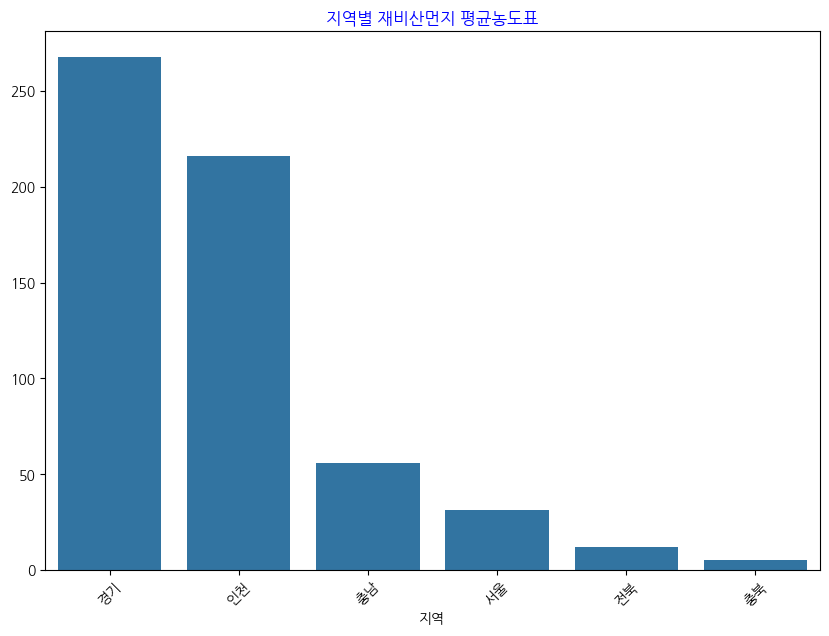

In [8]:
top = df['지역'].value_counts() # 지역별로 구분하여 빈도를 확인합니다.
plt.figure(figsize=(10,7))
sns.barplot(x=top[:20].index,y=top[:20].values)
plt.xticks(rotation=45)
plt.title('지역별 재비산먼지 평균농도표',color = 'blue')


6개의 지역 중, 데이터셋의 상위 4지역을 사용합니다. 이는 적은 데이터 분류는 노이즈로 판단될 수 있기 때문입니다.

Text(0.5, 1.0, '지역별 재비산먼지 평균농도표')

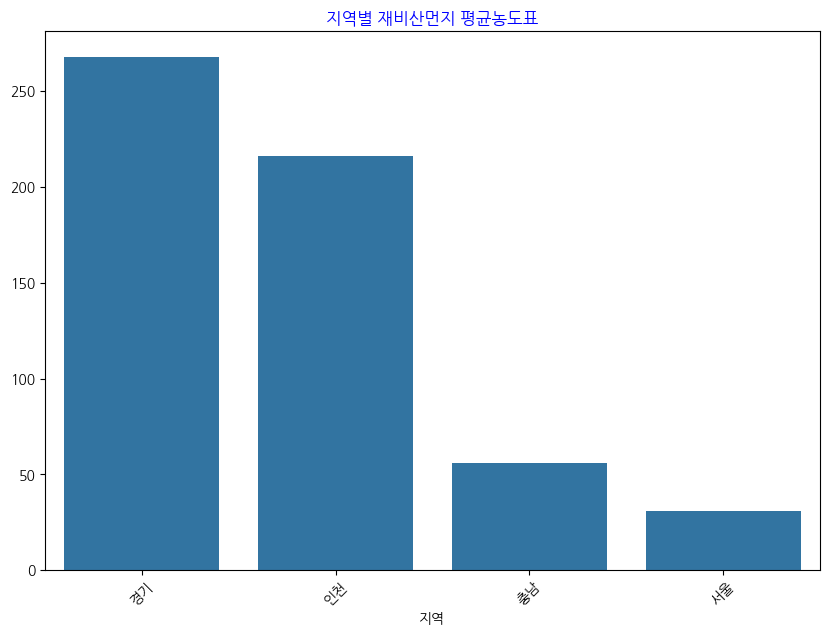

In [9]:
df = df[(df['지역'] == '경기') | (df['지역'] == '인천') | (df['지역'] == '충남') | (df['지역'] == '서울')] # 데이터셋의 상위 4지역만 사용합니다. 적은 데이터 분류는 노이즈로 판단될 수 있기 때문입니다.
df = df[(df['재비산먼지 평균농도'] > 0)] # 농도가 0보다 큰 경우에만 카운트합니다.
top = df['지역'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('지역별 재비산먼지 평균농도표',color = 'blue')

각 데이터별로 상관관계가 있는지 확인하기 위해 Heatmap으로 시각화하여 확인합니다.

재비산먼지 평균농도와 기온 간에 약한 상관관계가 있음을 확인할 수 있습니다.


/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


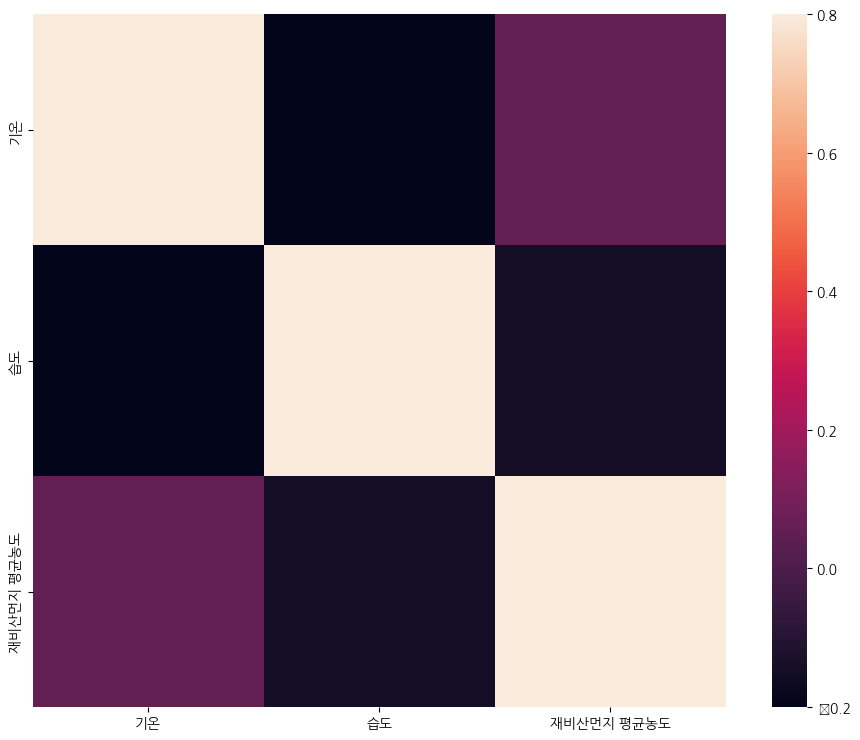

In [10]:
df_modified = df.iloc[:, 4:] # 분석에 필요한 데이터만을 추출.
corrmat = df_modified.corr() # 데이터프레임의 상관관계를 계산.
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True); # Heatmap 출력.

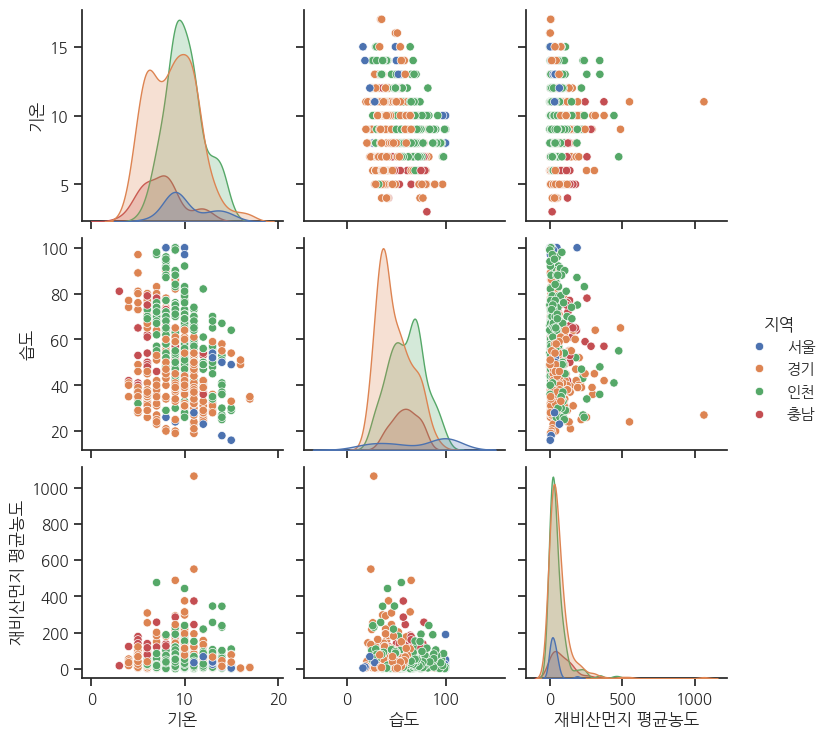

In [24]:
sns.pairplot(df, hue='지역', diag_kind='kde', kind='scatter') # 지역을 기준으로 

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYE

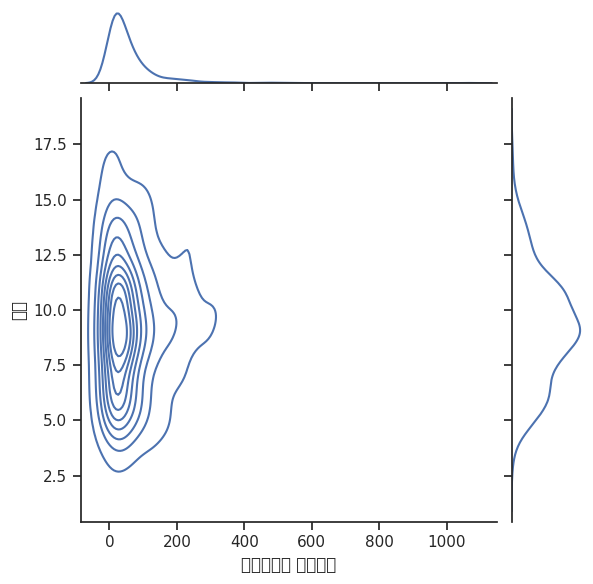

In [25]:

# examine our top three genres data distribution for popularity and danceability along a given x and y axis
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data = df,
    x="재비산먼지 평균농도", y="기온",
    kind="kde",
)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyp

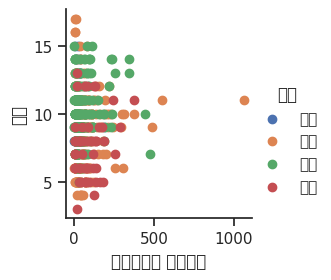

In [13]:
sns.FacetGrid(df, hue="지역") \
   .map(plt.scatter, "재비산먼지 평균농도", "기온") \
   .add_legend()

boxplot를 사용하여 outlier을 확인합니다.
재비산먼지 평균농도에서 다수의 outlier를 찾을 수 있었고, 다른 데이터에서는 outlier를 확인할 수 없었습니다.

<Axes: xlabel='지역명'>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyp

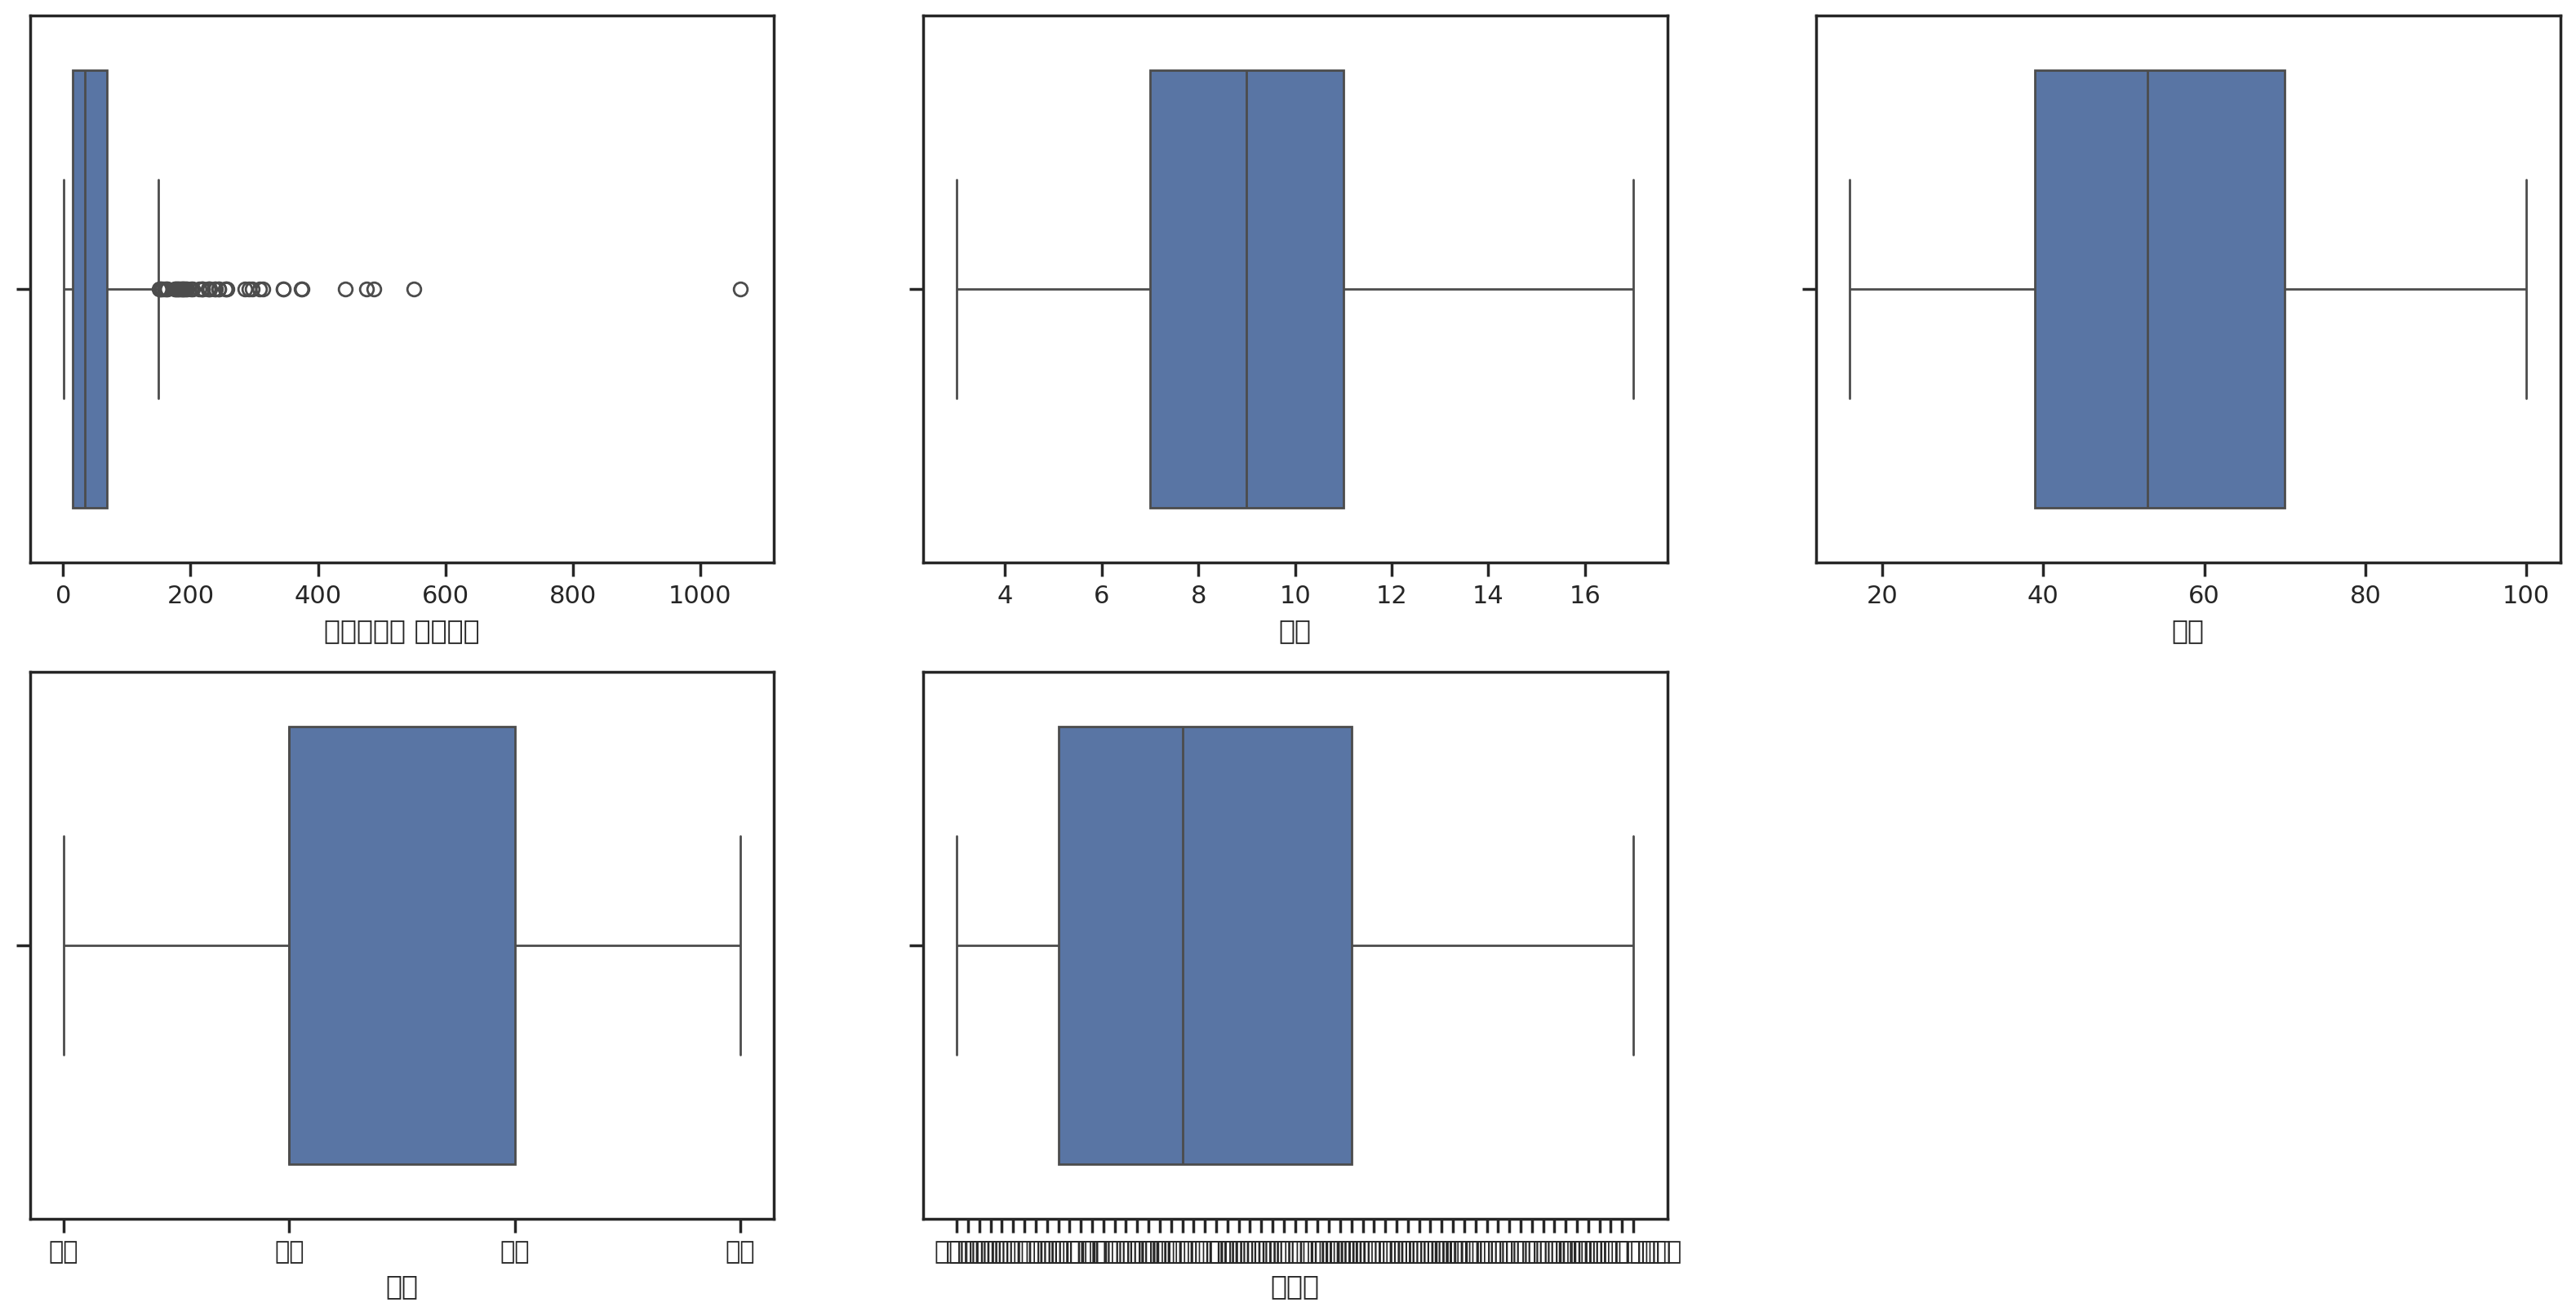

In [14]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = '재비산먼지 평균농도', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = '기온', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = '습도', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = '지역', data = df)

In [26]:
# choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('지역','재비산먼지 평균농도','기온','습도')]

y = df['지역']

X['지역'] = le.fit_transform(X['지역'])

# X = scaler.fit_transform(X)

y = le.transform(y)

In [39]:
from sklearn.cluster import KMeans

nclusters = 4 # 클러스터를 4개로 설정합니다
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 1, 3, 0, 0, 1, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 0,
       3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,

In [41]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans) # silhouette를 사용하여 클러스터링 결과의 점수를 확인합니다. 
# Silhouette 점수는 데이터가 속한 클러스터와 다른 클러스터 간의 거리를 기반으로 계산합니다.
# 높은 Silhouette 점수는 클러스터 안의 데이터 포인트들이 가깝게 모여있고, 동질성이 높음을 나타냅니다.
score

0.5416734759211417

In [18]:
# range: These are the iterations of the clustering process
# random_state: "Determines random number generation for centroid initialization."
# WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid. Source.
# Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are." Source. The value is appended to the wcss variable on each iteration.
# k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # 클러스터의 개수, 초기 중심점, 랜덤 시드를 설정합니다.
    kmeans.fit(X) # K-means 클러스터링을 수행합니다.
    wcss.append(kmeans.inertia_) # 클러스터링 결과의 WCSS를 리스트에 추가합니다.

# Elbow

wcss를 사용해 최적의 클러스터 개수를 확인해 본 결과. 그래프의 기울기가 작아지는 3개의 클러스터가 적합하다고 판단했습니다.

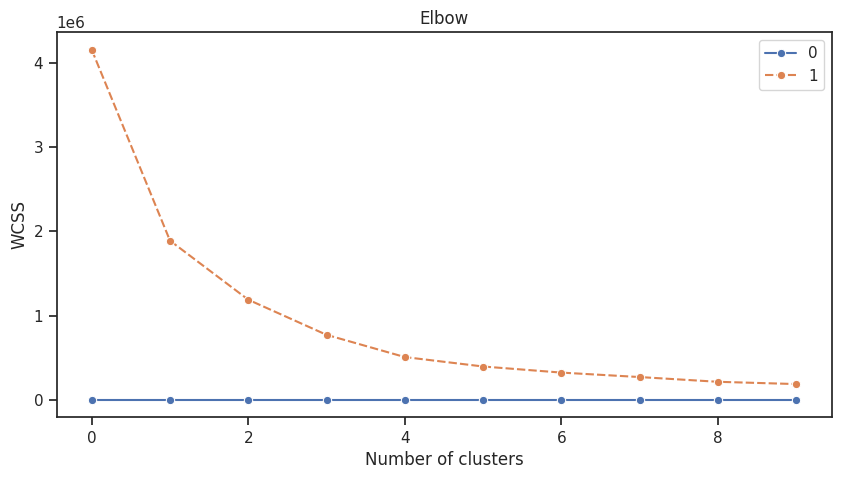

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 클러스터 시각화.
Elbow를 통해 찾은 3개의 클러스터로 군집을 형성하고 산점도로 표시합니다.

습도가 낮을 수록 제비산먼지 평균농도의 빈도가 높은 것을 확인할 수 있습니다.

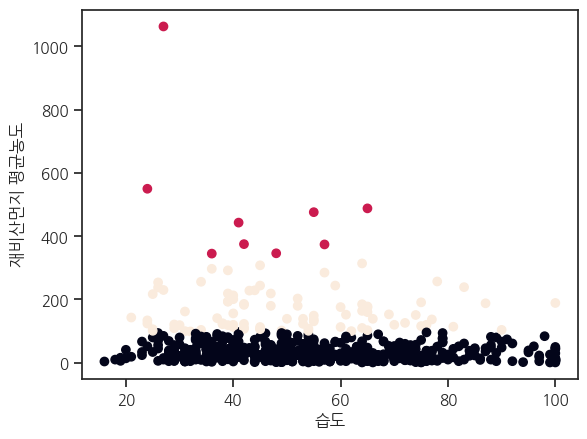

In [35]:
from sklearn.cluster import KMeans
font_path = './NanumGothic.ttf' # 폰트 경로 설정
font_manager.fontManager.addfont(font_path) # 폰트 등록
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name() # 폰트 설정

kmeans = KMeans(n_clusters = 3) # Elbow를 통해 찾은 클러스터의 개수를 반영합니다.
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['습도'],df['재비산먼지 평균농도'],c = labels)
plt.xlabel('습도')
plt.ylabel('재비산먼지 평균농도')
plt.show()

## 모델 평가

모델의 정확도는 0.2~0.5 사이로 낮은 정확도를 보여줍니다. 이는 데이터의 수가 부족하여 높은 제비산먼지 평균농도값이 노이즈로 처리되었을 가능성이 높다고 생각합니다. 하지만, 높은 습도에서 제비산먼지 평균농도가 높은 값을 관측할 수 없었으므로 유의미한 결과라고 생각합니다.

Elbow를 통해 얻은 최적화된 클러스터 개수를 적용한 결과, Silhouette 점수가 개선되었음을 확인할 수 있었습니다.

In [42]:
labels = kmeans.labels_ # 클러스터링 결과를 저장합니다.

correct_labels = sum(y == labels) # 실제 정답과 클러스터링 결과를 비교하여 올바르게 레이블된 개수를 계산합니다.

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size)) # 정확하게 레이블된 개수와 전체 샘플의 수를 출력합니다.

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size))) # 올바르게 레이블된 샘플의 비율로 정확도를 계산하여 출력합니다.

score = metrics.silhouette_score(X, labels) # silhouette를 사용하여 클러스터링 결과의 점수를 확인합니다. 
# Silhouette 점수는 데이터가 속한 클러스터와 다른 클러스터 간의 거리를 기반으로 계산합니다.
# 높은 Silhouette 점수는 클러스터 안의 데이터 포인트들이 가깝게 모여있고, 동질성이 높음을 나타냅니다.
score

Result: 243 out of 571 samples were correctly labeled.
Accuracy score: 0.43


0.6350784281244591